In [1]:
import pandas as pd 
import numpy as np

import seaborn as sns
sns.set_style("whitegrid")

from matplotlib import pyplot as plt

In [2]:
path = "C:\\Users\\jgonzalez\\Documents\\Indicadores\\data\\"

In [3]:
data_precip = pd.read_excel(path+'ATP01PT01-PT01_(Tungurahua)_Precipitación_Horario.xlsx',header=11)
data_precip = data_precip[["Fecha","Valor"]]
data_precip = data_precip.dropna()
data_precip.index = data_precip["Fecha"]
data_precip = data_precip.rename(columns={'Valor': 'mm'})
data_precip = data_precip.drop(columns=["Fecha"])
#data_precip = data_precip.resample("D").sum()
data_precip

,mm
Fecha,
2017-11-09 15:00:00,0.0
2017-11-09 16:00:00,0.2
2017-11-09 17:00:00,1.6
2017-11-09 18:00:00,3.3
2017-11-09 19:00:00,0.2
...,...
2023-12-13 19:00:00,0.0
2023-12-13 20:00:00,0.0
2023-12-13 21:00:00,0.0


In [4]:
#data_caudal = pd.read_excel(path+'ATP01HI02-VERTEDERO_EN_HUMEDAL_TUNGURAHUA_Caudal_Horario.xlsx',header=11)
data_caudal = pd.read_excel(path+'ATP01HI01-Tungurahua_Caudal_Horario.xlsx',header=11)

data_caudal = data_caudal[["Fecha","Valor"]]
data_caudal = data_caudal.dropna()
data_caudal.index = data_caudal["Fecha"]
data_caudal = data_caudal.rename(columns={"Valor": "l/s"})
data_caudal = data_caudal.drop(columns=["Fecha"])
#data_caudal = data_caudal.resample("D").mean()
data_caudal

,l/s
Fecha,
2017-11-28 00:00:00,49.622299
2017-11-28 01:00:00,49.780038
2017-11-28 02:00:00,49.837721
2017-11-28 03:00:00,50.018571
2017-11-28 04:00:00,50.121737
...,...
2023-12-13 19:00:00,57.679556
2023-12-13 20:00:00,57.729311
2023-12-13 21:00:00,57.756969


In [5]:
data = pd.concat([data_precip, data_caudal], axis=1)
data = data.loc[data.index > "2018"]

data = data.loc[data.index < "2024"]
data

,mm,l/s
Fecha,,
2018-01-01 01:00:00,1.6,189.436245
2018-01-01 02:00:00,0.6,255.998933
2018-01-01 03:00:00,0.0,376.990625
2018-01-01 04:00:00,0.0,413.139396
2018-01-01 05:00:00,0.0,350.411487
...,...,...
2023-12-13 19:00:00,0.0,57.679556
2023-12-13 20:00:00,0.0,57.729311
2023-12-13 21:00:00,0.0,57.756969


In [19]:
# for y in range(2021,2023):
#     plt.hist(np.round(data_caudal["l/s"].loc[data_caudal.index.year==y],0),bins=500)
#     moda= np.round(data_caudal["l/s"].loc[data_caudal.index.year==y],0).mode()
#     med = np.round(data_caudal["l/s"].loc[data_caudal.index.year==y],0).median()
#     plt.xlim([0, 100])
#     plt.title(str(y)+' - moda='+str(moda[0])+' med='+str(med))
#     plt.show()

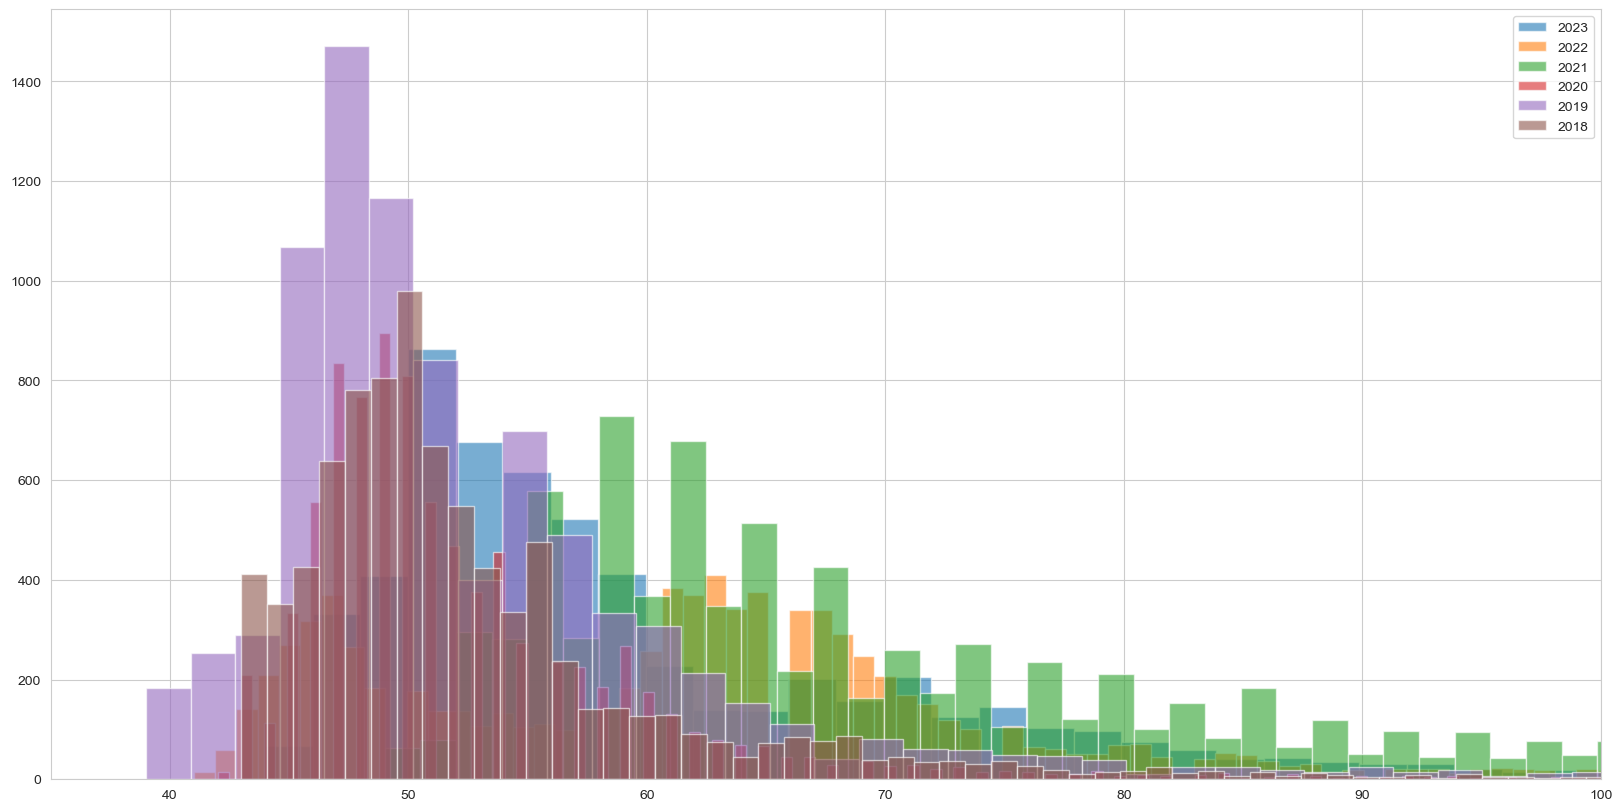

In [13]:
plt.figure(figsize=(20,10))

arr_mod = []
arr_med = []
ys = []
for y in range(2023,2017,-1):
    plt.hist(np.round(data["l/s"].loc[data.index.year==y],0),bins=500,label=str(y),histtype='bar',alpha = 0.6)
    moda= np.round(data["l/s"].loc[data.index.year==y],0).mode()
    med = np.round(data["l/s"].loc[data.index.year==y],0).median()
    plt.xlim([35, 100])

    arr_mod.append([moda[0]])
    arr_med.append([med])
    ys.append(y)

plt.legend()
plt.show()





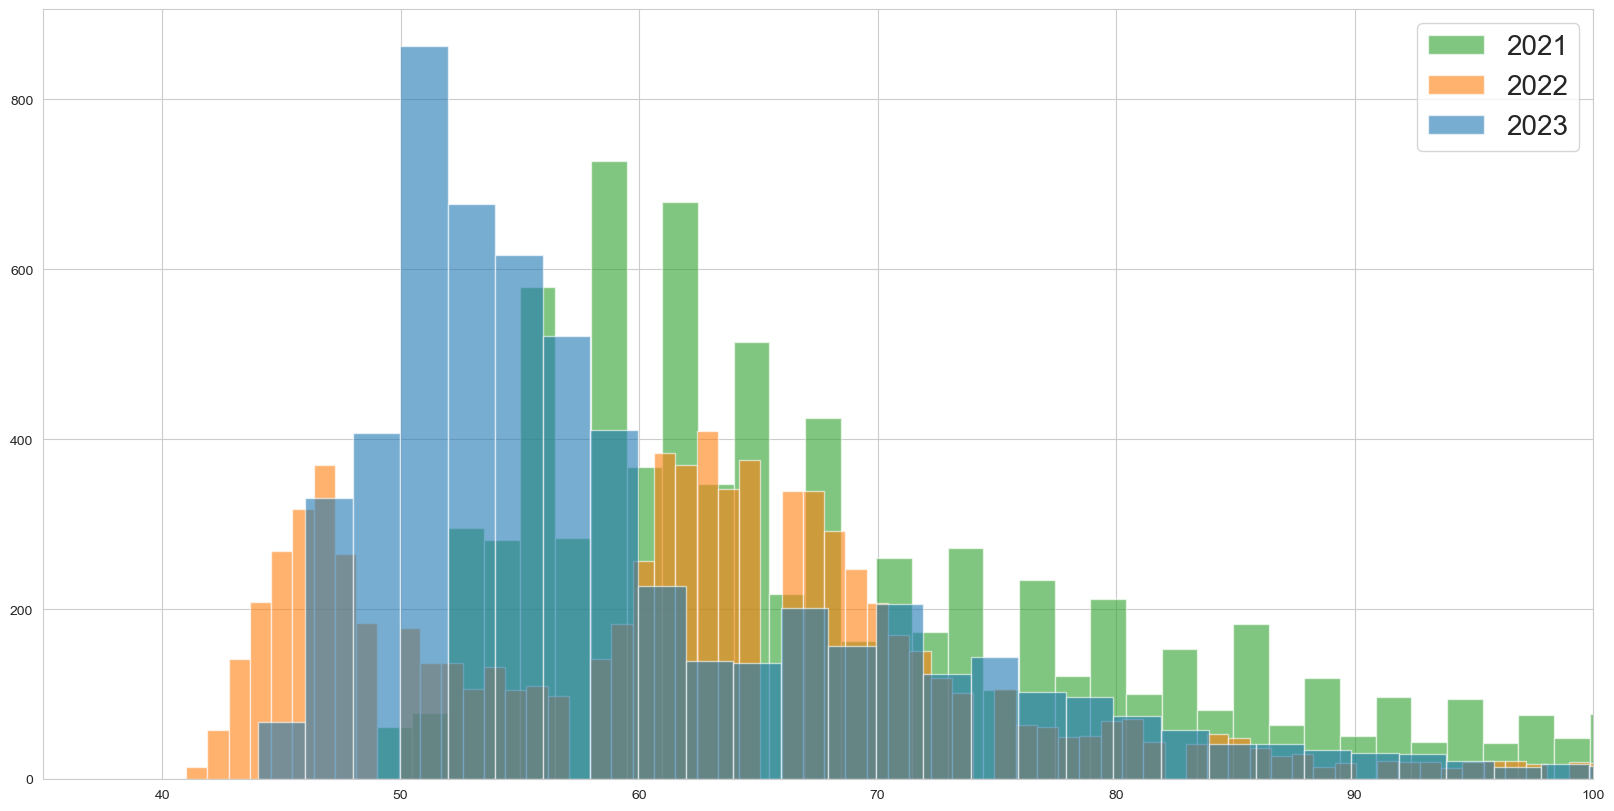

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [29]:
fig =plt.figure(figsize=(20,10))

arr_mod = []
arr_med = []
ys = []
colors = ["tab:green","tab:orange","tab:blue"]
for y,c in zip([2021,2022,2023],colors):
    q =  np.round(data["l/s"].loc[data.index.year==y],0)
    plt.hist(q,bins=500,label=str(y),histtype='bar',alpha = 0.6,color=c)
    moda=q.mode()
    med = q.median()
    plt.xlim([35, 100])

    arr_mod.append([moda[0]])
    arr_med.append([med])
    ys.append(y)

plt.legend(fontsize=20)
plt.show()

plt.figure(figsize=(20,10))



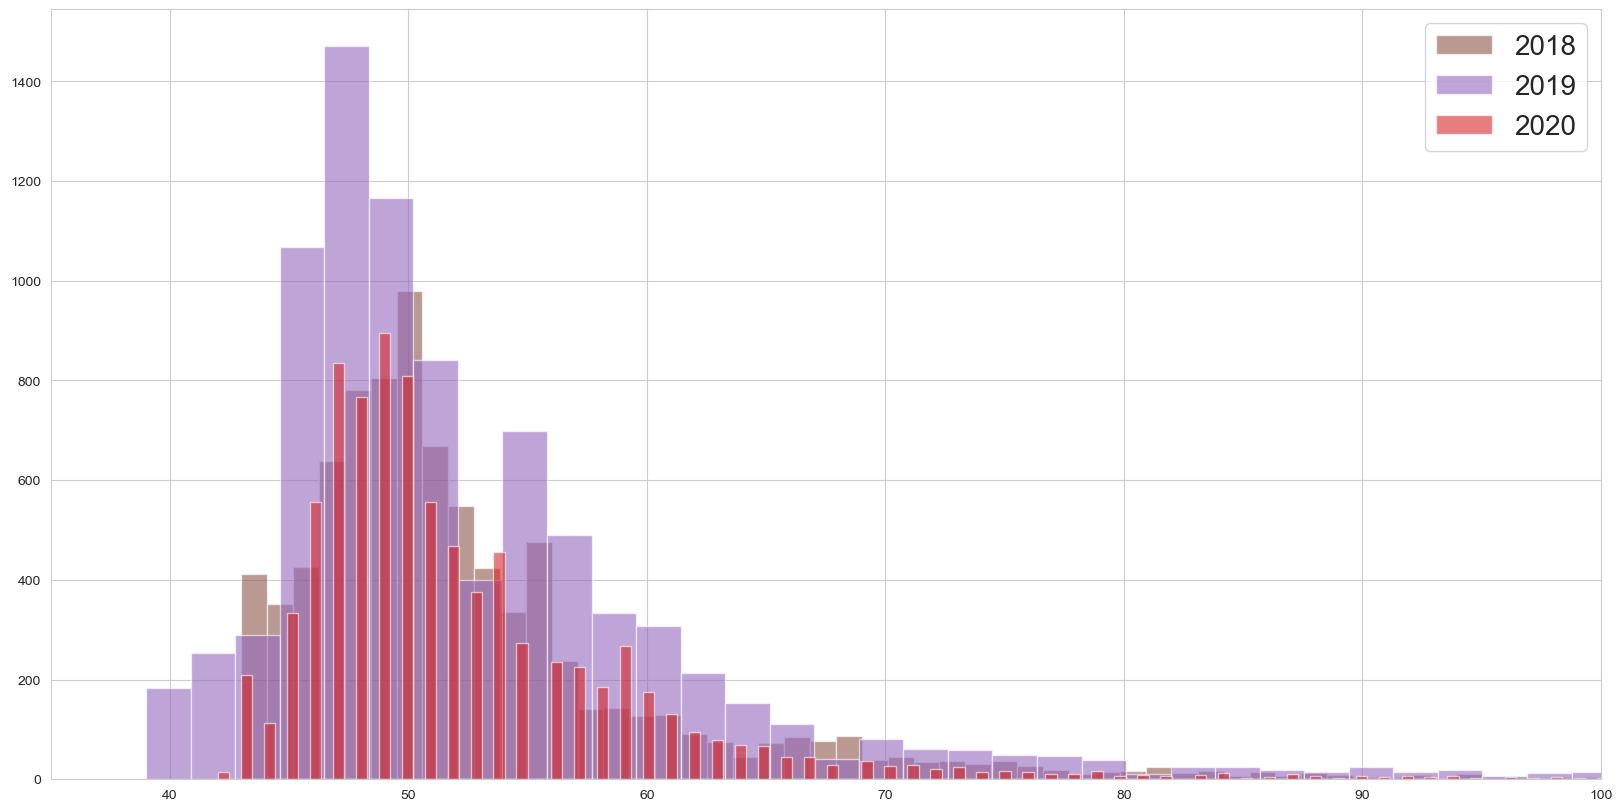

<Figure size 2000x1000 with 0 Axes>

<Figure size 2000x1000 with 0 Axes>

In [26]:
fig =plt.figure(figsize=(20,10))

arr_mod = []
arr_med = []
ys = []
#for y in range(2023,2017,-1):
colors = ["tab:brown","tab:purple","tab:red"]

for y,c in zip([2018,2019,2020],colors):
    q =  np.round(data["l/s"].loc[data.index.year==y],0)
    plt.hist(q,bins=500,label=str(y),histtype='bar',alpha = 0.6,color=c)
    moda=q.mode()
    med = q.median()
    plt.xlim([35, 100])

    arr_mod.append([moda[0]])
    arr_med.append([med])
    ys.append(y)

plt.legend(fontsize=20)
plt.show()
plt.figure(figsize=(20,10))



In [24]:
# #fig =plt.figure(figsize=(20,5))

# arr_mod = []
# arr_med = []
# ys = []
# for y in range(2023,2017,-1):
# #for y in [2019,2022,2023]:
#     q =  np.round(data["l/s"].loc[data.index.year==y],0)
#     plt.hist(q,bins=500,label=str(y),histtype='bar',alpha = 0.6)
#     moda=q.mode()
#     med = q.median()
#     plt.xlim([35, 100])
#     plt.title(y)

#     arr_mod.append([moda[0]])
#     arr_med.append([med])
#     ys.append(y)
#     plt.show()
# plt.legend()
# plt.show()

# plt.figure(figsize=(20,5))



2023 40.90169088873416
2022 29.84971978246829
2021 42.87233896453195
2020 13.851654564768907
2019 34.317380749893275
2018 21.570266163941934


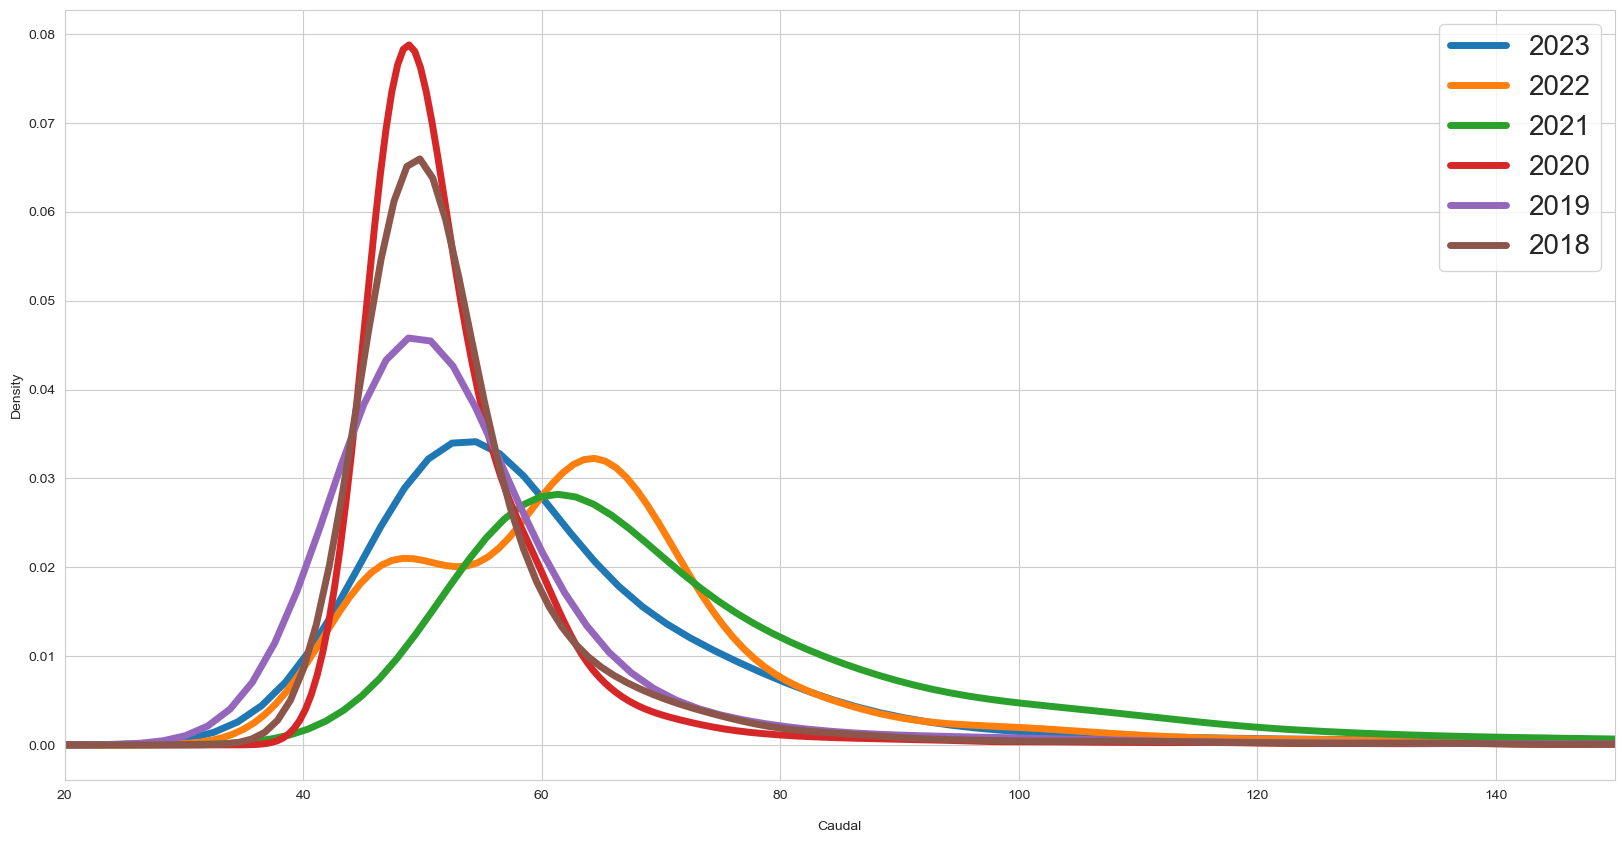

In [22]:
fig =plt.figure(figsize=(20,10))

arr_mod = []
arr_med = []
ys = []
colors = ["tab:blue","tab:orange","tab:green","tab:red","tab:purple","tab:brown","tab:pink","tab:gray","tab:olive","tab:cyan"]
for y,c in zip(range(2023,2017,-1),colors):
    q = np.round(data["l/s"].loc[data.index.year==y],0)
    q.plot.kde(label=str(y),lw=5,color=c)
    moda= np.round(data["l/s"].loc[data.index.year==y],0).mode()
    med = np.round(data["l/s"].loc[data.index.year==y],0).median()
    plt.xlim([20, 150])

    arr_mod.append([moda[0]])
    arr_med.append([med])
    ys.append(y)

    print(y,q.std())


plt.xlabel("\nCaudal")
plt.legend(fontsize=20)
plt.show()


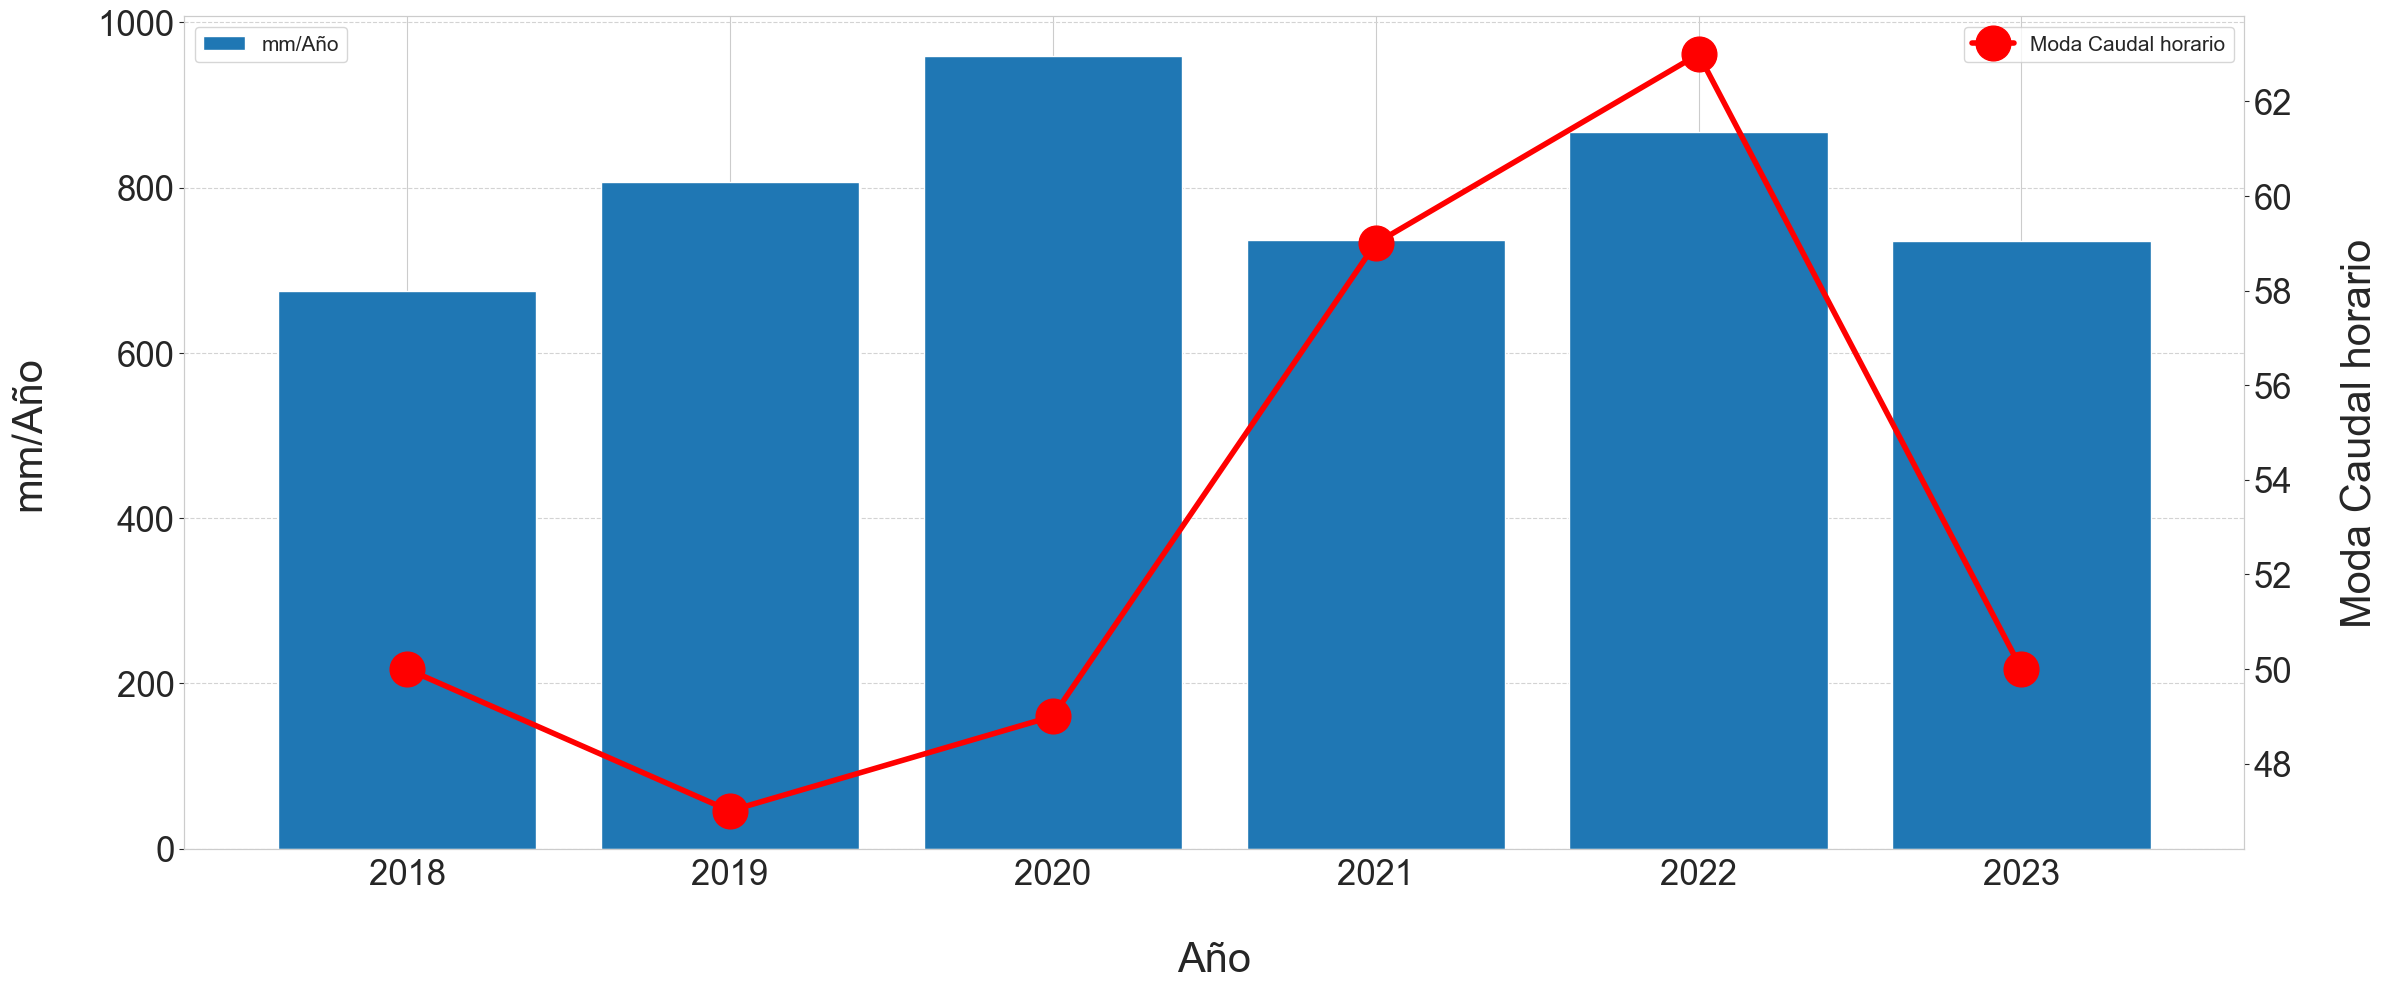

In [22]:
anual = data.mm.resample("Y").sum()

fig, ax = plt.subplots(figsize=(24,10))
ax2 = ax.twinx()

#ax.set_title('my title',size=25)
ax.tick_params(axis='both', which='major', labelsize=25)
ax2.tick_params(axis='both', which='major', labelsize=25)
ax.set_xlabel('\nAño',size=30)

ax.bar(ys,anual)#, color='red', marker='o',linewidth=4,markersize=20)
ax.set_ylabel('mm/Año\n',size=30)
ax.legend(['mm/Año'], loc='upper left',prop={'size': 15})

ax2.plot(ys,arr_mod,color='red', marker='o',linewidth=4,markersize=25)#,linewidth=4,markersize=25
ax2.set_ylabel('\nModa Caudal horario',size=30)
ax2.legend(['Moda Caudal horario'], loc='upper right',prop={'size': 15})



ax.yaxis.grid(color='lightgray', linestyle='dashed')
plt.tight_layout()
#plt.savefig(".pdf")
#plt.savefig(".png")
plt.grid(False)
plt.show()

0    50.0
Name: l/s, dtype: float64
0    49.0
Name: l/s, dtype: float64
0    47.0
Name: l/s, dtype: float64
0    50.0
Name: l/s, dtype: float64


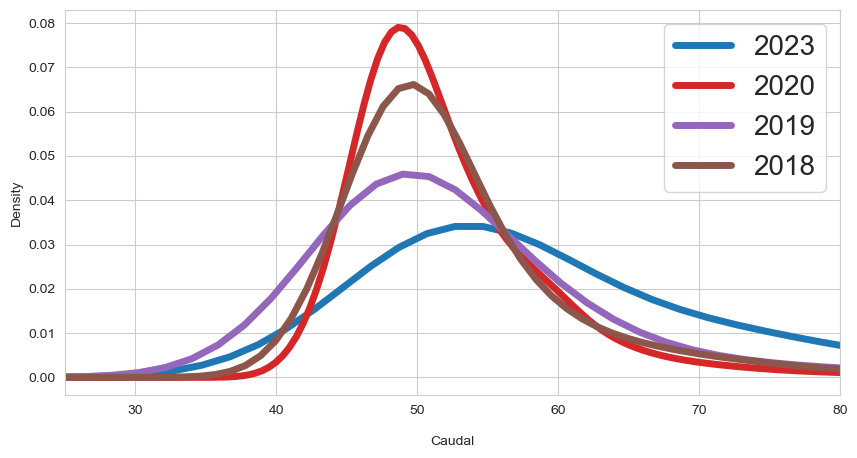

In [30]:
fig =plt.figure(figsize=(10,5))

arr_mod = []
arr_med = []
ys = []
colors = ["tab:blue","tab:red","tab:purple","tab:brown","tab:pink"]
for y,c in zip([2023,2020,2019,2018],colors):
    np.round(data["l/s"].loc[data.index.year==y],2).plot.kde(label=str(y),lw=5,color=c)
    moda= np.round(data["l/s"].loc[data.index.year==y],0).mode()
    med = np.round(data["l/s"].loc[data.index.year==y],0).median()
    plt.xlim([25, 80])

    print(moda)
    arr_mod.append([moda[0]])
    arr_med.append([med])
    ys.append(y)
plt.xlabel("\nCaudal")
plt.legend(fontsize=20)
plt.show()


0    49.0
Name: l/s, dtype: float64
0    47.0
Name: l/s, dtype: float64
0    50.0
Name: l/s, dtype: float64


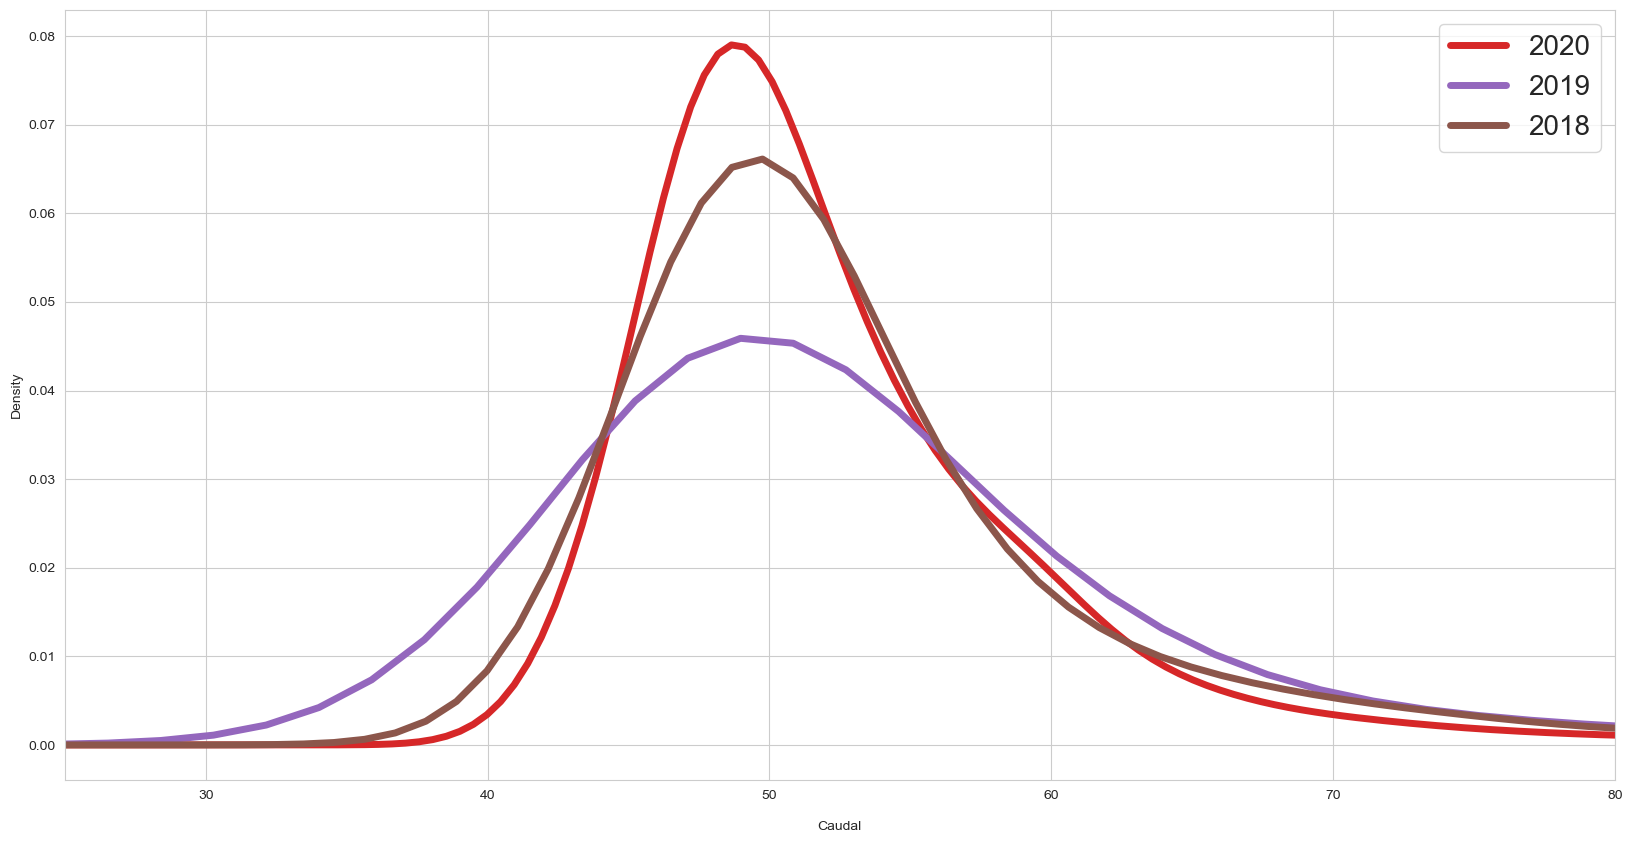

In [32]:
fig =plt.figure(figsize=(20,10))

arr_mod = []
arr_med = []
ys = []
colors = ["tab:red","tab:purple","tab:brown","tab:pink"]
for y,c in zip(range(2020,2017,-1),colors):
    np.round(data["l/s"].loc[data.index.year==y],2).plot.kde(label=str(y),lw=5,color=c)
    moda= np.round(data["l/s"].loc[data.index.year==y],0).mode()
    med = np.round(data["l/s"].loc[data.index.year==y],0).median()
    plt.xlim([25, 80])

    print(moda)
    arr_mod.append([moda[0]])
    arr_med.append([med])
    ys.append(y)
plt.xlabel("\nCaudal")
plt.legend(fontsize=20)
plt.show()


Los años 18-19-20 tienen mayor cantidad de datos entre 45 - 55 L/s 

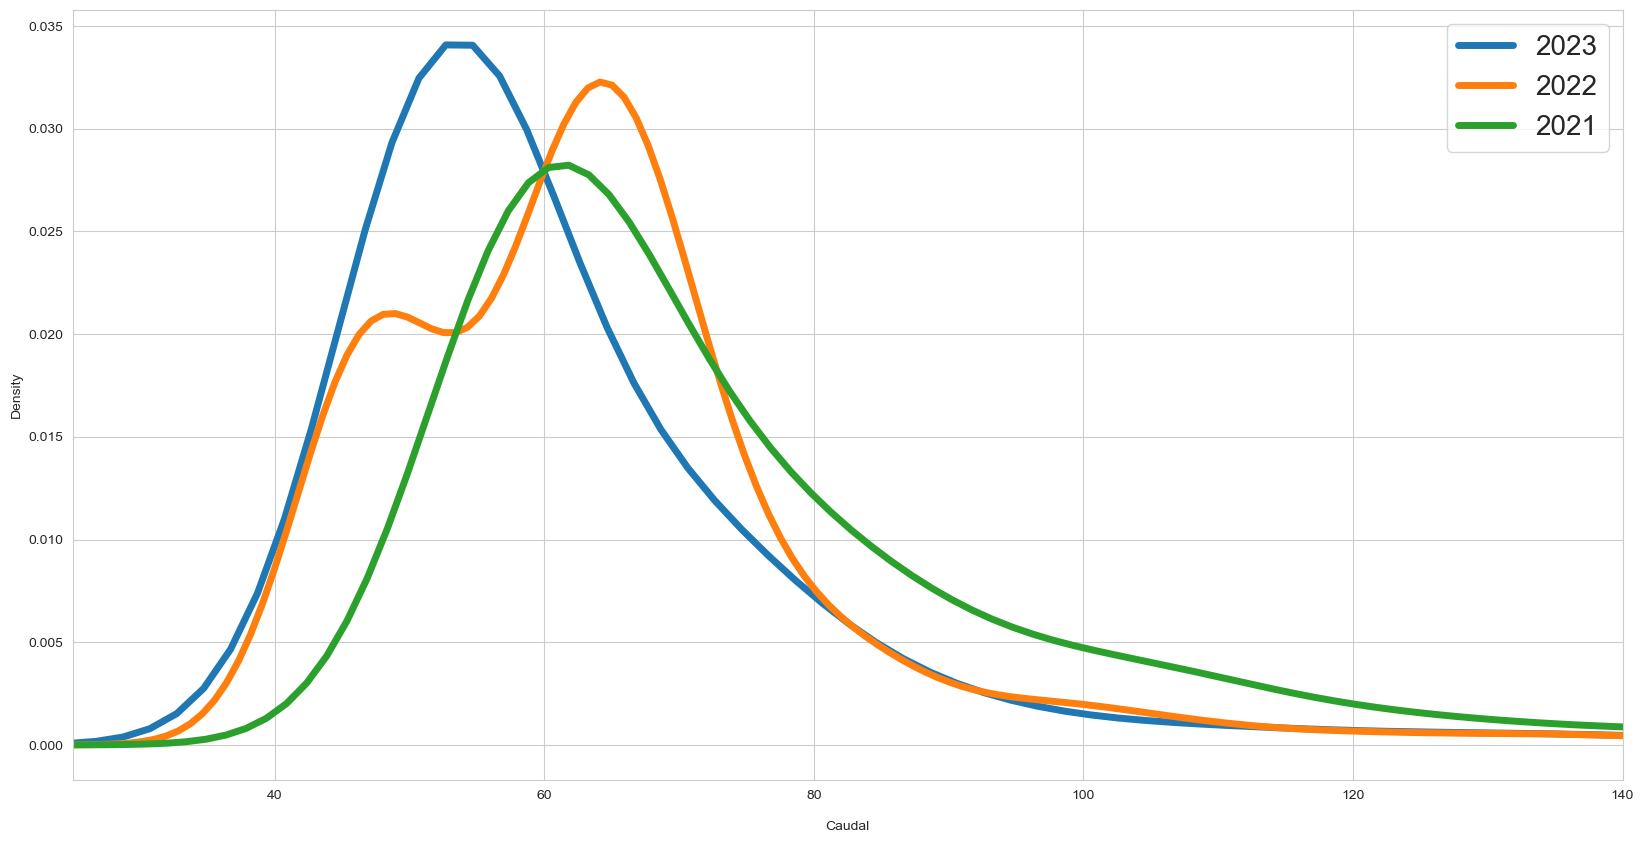

In [33]:
fig =plt.figure(figsize=(20,10))

arr_mod = []
arr_med = []
ys = []
colors = ["tab:blue","tab:orange","tab:green"]

for y,c in zip(range(2023,2020,-1),colors):
    np.round(data["l/s"].loc[data.index.year==y],2).plot.kde(label=str(y),lw=5,color=c)
    moda= np.round(data["l/s"].loc[data.index.year==y],0).mode()
    med = np.round(data["l/s"].loc[data.index.year==y],0).median()
    plt.xlim([25, 140])

    arr_mod.append([moda[0]])
    arr_med.append([med])
    ys.append(y)
plt.xlabel("\nCaudal")
plt.legend(fontsize=20)
plt.show()


Los años 21 y 22 tienen mayor cantidad de datos entre 55 - 75 L/s. El año 23 es una mezcla de ambos, sin embargo tiene mas similutd con el los datos del 21-22

Si analizamos el Q95 Dry vs el plot de la moda, tiene mas sentido el plot dfe modas al revisar la distribucion del caudal